In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('')
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
df_cars = pd.read_csv('norway_new_car_sales_by_month.csv',parse_dates= {"Date" : ["Year","Month"]})

In [3]:
df_cars=df_cars[['Date','Quantity']]

In [4]:
print(df_cars.dtypes)

Date        datetime64[ns]
Quantity             int64
dtype: object


In [5]:
df_cars.shape

(121, 2)

In [6]:
df_cars=df_cars.set_index('Date')

<AxesSubplot:title={'center':' Total Quantity of Cars'}, xlabel='Date'>

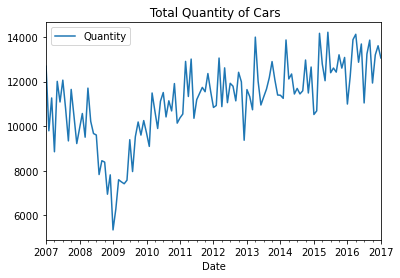

In [7]:
# plotting the original data
df_cars[['Quantity']].plot(title=' Total Quantity of Cars')

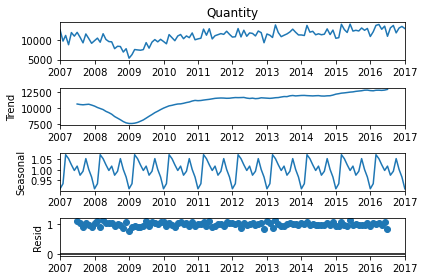

In [8]:
decompose_result = seasonal_decompose(df_cars['Quantity'],model='multiplicative')
decompose_result.plot();


Fitting the Data with Holt-Winters Exponential Smoothing

Define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.

In [9]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df_cars.index.freq = 'MS'

In [10]:
#Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

### Single HWES

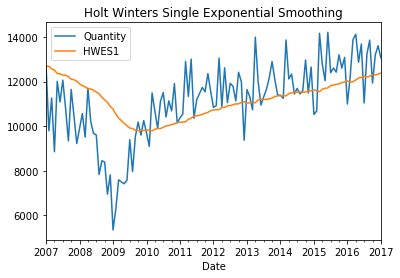

In [11]:
df_cars['HWES1'] = SimpleExpSmoothing(df_cars['Quantity']).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df_cars[['Quantity','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

### Double HWES

C:\Users\Pandiri Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pandiri Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


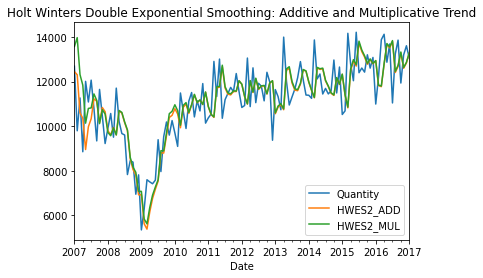

In [12]:
df_cars['HWES2_ADD'] = ExponentialSmoothing(df_cars['Quantity'],trend='add').fit().fittedvalues
df_cars['HWES2_MUL'] = ExponentialSmoothing(df_cars['Quantity'],trend='mul').fit().fittedvalues
df_cars[['Quantity','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

### Triple HWES

C:\Users\Pandiri Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Pandiri Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


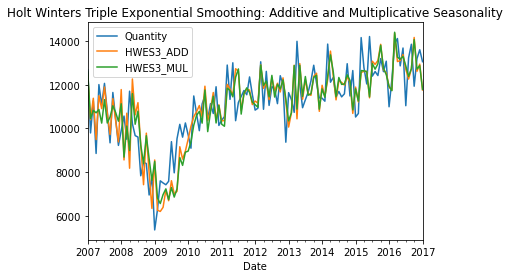

In [13]:
df_cars['HWES3_ADD'] = ExponentialSmoothing(df_cars['Quantity'],
                                            trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df_cars['HWES3_MUL'] = ExponentialSmoothing(df_cars['Quantity'],
                                            trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df_cars[['Quantity','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [14]:
forecast_data=pd.read_csv('norway_new_car_sales_by_month.csv',
                          parse_dates= {"Date" : ["Year","Month"]})

In [15]:
forecast_data=forecast_data[['Date','Quantity']]

In [16]:
forecast_data=forecast_data.set_index('Date')

In [17]:
forecast_data.index.freq = 'MS'

In [18]:
train_cars = forecast_data[:97]
test_cars = forecast_data[97:]

In [19]:
train_cars.shape

(97, 1)

In [20]:
test_cars.shape

(24, 1)

C:\Users\Pandiri Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

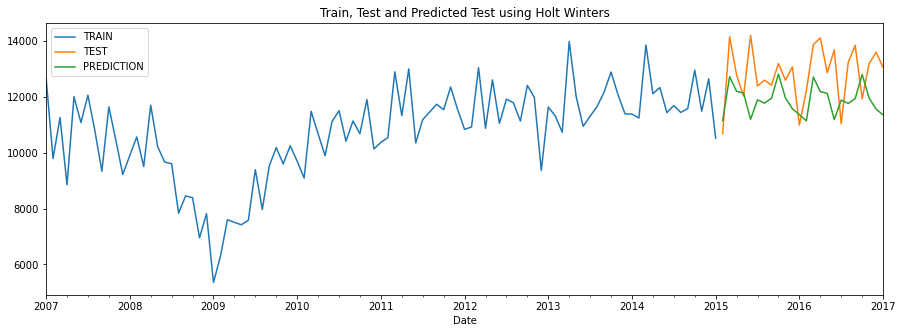

In [21]:
fitted_model = ExponentialSmoothing(train_cars['Quantity'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_cars['Quantity'].plot(legend=True,label='TRAIN')
test_cars['Quantity'].plot(legend=True,label='TEST',figsize=(15,5))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [22]:
print('Smallest date for which predictions were made: ' )
print(str(test_cars.index.min()))


Smallest date for which predictions were made: 
2015-02-01 00:00:00


In [23]:
print('Smallest date for which predictions were made: ' )
print(str(test_cars.index.max()))


Smallest date for which predictions were made: 
2017-01-01 00:00:00


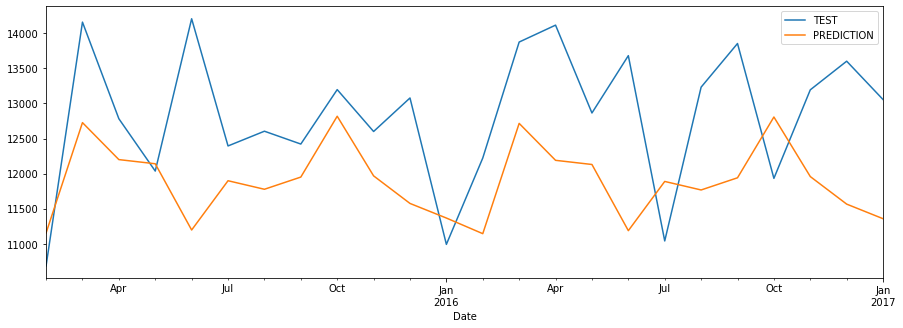

In [26]:
test_cars['Quantity'].plot(legend=True,label='TEST',figsize=(15,5))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2015-02-01','2017-01-01']);

### Evaluation Metrics

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(f'Mean Absolute Error = {mean_absolute_error(test_cars,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_cars,test_predictions)}')
print(f'MAPE  = {mean_absolute_percentage_error(test_cars, test_predictions)}')

Mean Absolute Error = 1156.2549704696648
Mean Squared Error = 1859328.0495257105
MAPE  = 0.08762642331155501
